## Load the excel files into dataframes
We will use year 1 main to do perform exploratory data analysis and visualization. I already have a script to load the results from the excel file.


In [1]:
# Define function to load the data from the excel file into the dataframe
def load_results(data):
    '''
    Load results from the raw excel files into pandas dataframe
    
    Params:
        data: string 
        filename of the file containing the student results
    
    Returns: 
        Pandas.DataFrame
    '''
    df= pd.read_excel(data,  skiprows=11)    
    df.drop(['S/N', 'NAME', 'RECOMMENDATIONS'], axis=1, inplace=True) #drop unwanted columns
    df.dropna(inplace=True) #get rid of rows with null values
    return df

def save_results(filename, df):
    """
    Save's the dataframe passed in a csv file
    
    Params:
        filename: String
            The filename to be used to save the data
        df: Pandas.DataFrame
            The dataframe containing the results to be saved
    """
    df.to_csv(filename, index=False)
    
    

In [2]:
# import the scripts to be used to load the results
sys.path.append('../Scripts')
from load_data import LoadResults



In [3]:
# using thee load_data script to load the data from the excel file to a pandas DataFrame
sys.path.append('../')
loader = LoadResults()
year1Main = loader.load_results("../data/year1Main.xlsx")
year1Main.head()

,REG NO,ECCI1101,ECCI1102,ECCI1103,ECCI1104,ECCI1105,ECCI1106,ECCI1107,ECCI1201,ECCI1202,...,ECCI1205,ECCI1206,ECCI1207,ECCI1208,UCCC1101,UCCC1102,UCCC1103,UCCC1201,AVG,REMARKS
0,ECCI/05166/2013S,D,D,A,C,A,B,D,B,B,...,D,C,C,B,B,B,B,D,60.83,PASS
1,ECCI/05167/2013S,C,D,A,B,A,B,C,A,B,...,B,C,A,A,A,B,C,B,66.43,PASS
2,ECCI/05168/2013S,C,C,C,B,B,B,D,B,D,...,D,D,C,B,A,B,D,D,56.30,PASS
3,ECCI/05169/2013S,D,C,A,B,B,A,D,B,A,...,C,A,C,B,A,B,B,B,65.55,PASS
4,ECCI/05170/2013S,B,D,A,B,A,C,B,B,A,...,B,A,C,B,B,A,B,B,65.18,PASS


## Exploratory data analysis
In this step, I will the exploratory data analysis to learn the properties and features of the data. This step will help understand the datasets I have better and determine if its quality data. I will check for missing values in the datasets, the shape of the dataset and other attributes of the data. I will also plot various visualization plots to gain better insight of the data and how different features in the dataset are correlated

In [4]:
# check the shape of the dataset
year1Main.shape

(15, 22)

From the shape of the dataset, there were 15 students in year 1

In [5]:
# Get all the column names for year 1
# from the column names, we can obtain year 1 units
cols = year1Main.columns.to_list()
cols

['REG NO',
 'ECCI1101',
 'ECCI1102',
 'ECCI1103',
 'ECCI1104',
 'ECCI1105',
 'ECCI1106',
 'ECCI1107',
 'ECCI1201',
 'ECCI1202',
 'ECCI1203',
 'ECCI1204',
 'ECCI1205',
 'ECCI1206',
 'ECCI1207',
 'ECCI1208',
 'UCCC1101',
 'UCCC1102',
 'UCCC1103',
 'UCCC1201',
 'AVG',
 'REMARKS']

In [6]:
# get year 1 units
year1Units = cols[1:-2]
year1Units

['ECCI1101',
 'ECCI1102',
 'ECCI1103',
 'ECCI1104',
 'ECCI1105',
 'ECCI1106',
 'ECCI1107',
 'ECCI1201',
 'ECCI1202',
 'ECCI1203',
 'ECCI1204',
 'ECCI1205',
 'ECCI1206',
 'ECCI1207',
 'ECCI1208',
 'UCCC1101',
 'UCCC1102',
 'UCCC1103',
 'UCCC1201']

In [7]:
# check for missing results
year1Main.isna().sum()

REG NO      0
ECCI1101    0
ECCI1102    0
ECCI1103    0
ECCI1104    0
ECCI1105    0
ECCI1106    0
ECCI1107    0
ECCI1201    0
ECCI1202    0
ECCI1203    0
ECCI1204    0
ECCI1205    0
ECCI1206    0
ECCI1207    0
ECCI1208    0
UCCC1101    0
UCCC1102    0
UCCC1103    0
UCCC1201    0
AVG         0
REMARKS     0
dtype: int64

There are no missing results in this dataset

In [8]:
# check for duplicates
year1Main.duplicated().sum()

0

There are no duplicate values in year 1 dataset

In [9]:
year1Main['AVG'].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [10]:
year1Main.shape

(15, 22)

## Visualization

In [11]:
# visualize the performance in a single unit
sys.path.append('../Scripts')
from plot import Plot

In [12]:
plot = Plot()

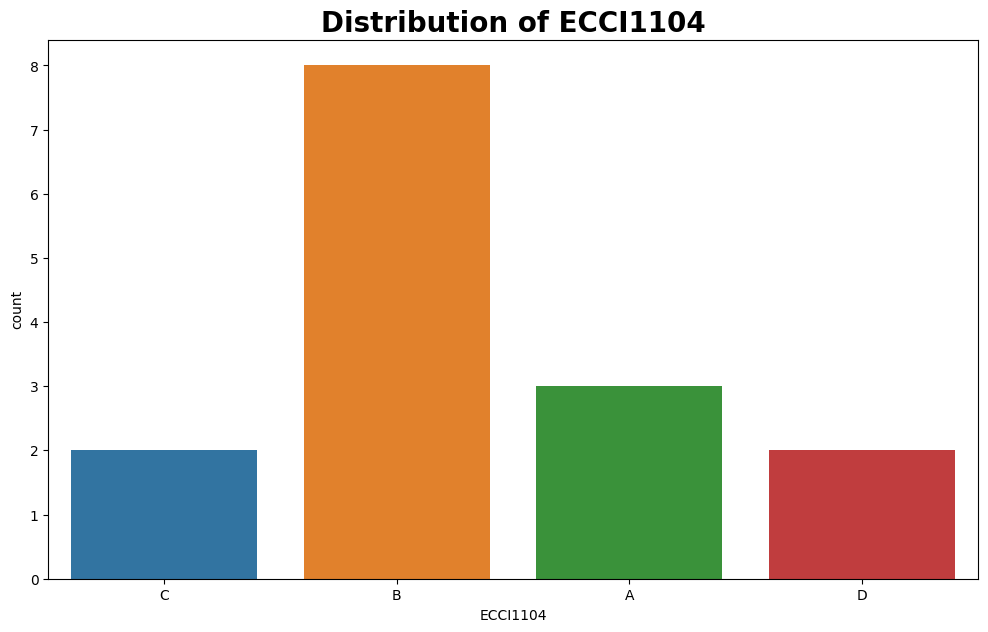

In [13]:
plot.plot_count(year1Main,  'ECCI1104')

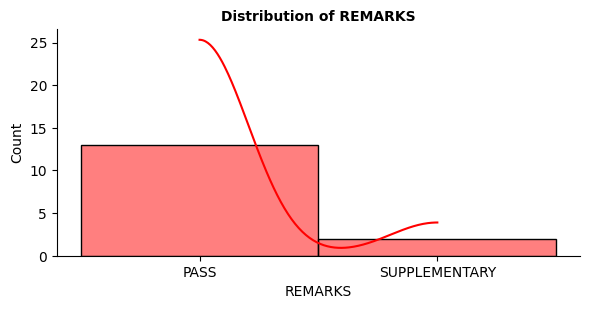

In [14]:
# visualize the average student's performance
plot.plot_hist(year1Main,  'REMARKS', 'red')

In [15]:
# select the results of a single student
import pandas as pd
std = year1Main[ (year1Main['REG NO'] == 'ECCI/05173/2013S' )]
std
rslt = pd.DataFrame(std, columns = year1Units)
rslt

,ECCI1101,ECCI1102,ECCI1103,ECCI1104,ECCI1105,ECCI1106,ECCI1107,ECCI1201,ECCI1202,ECCI1203,ECCI1204,ECCI1205,ECCI1206,ECCI1207,ECCI1208,UCCC1101,UCCC1102,UCCC1103,UCCC1201
7,C,F,A,C,C,C,B,B,F,B,B,D,D,C,B,A,B,C,B


<AxesSubplot: xlabel='Grade', ylabel='Count of Grades'>

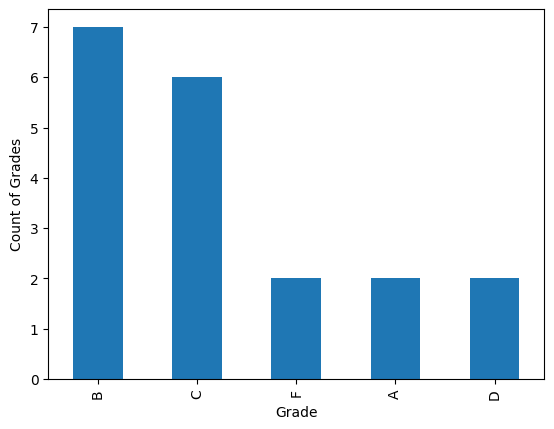

In [16]:
row = rslt.iloc[0]
row.value_counts().plot(kind='bar', ylabel='Count of Grades', xlabel='Grade')

In [17]:
#year1Main

In [18]:
# for testing script used for visualization
sys.path.append('../Scripts')
from preprocess import Preprocess
preprocessor = Preprocess()

In [19]:
preprocessor.get_units(year1Main)

['ECCI1101',
 'ECCI1102',
 'ECCI1103',
 'ECCI1104',
 'ECCI1105',
 'ECCI1106',
 'ECCI1107',
 'ECCI1201',
 'ECCI1202',
 'ECCI1203',
 'ECCI1204',
 'ECCI1205',
 'ECCI1206',
 'ECCI1207',
 'ECCI1208',
 'UCCC1101',
 'UCCC1102',
 'UCCC1103',
 'UCCC1201']

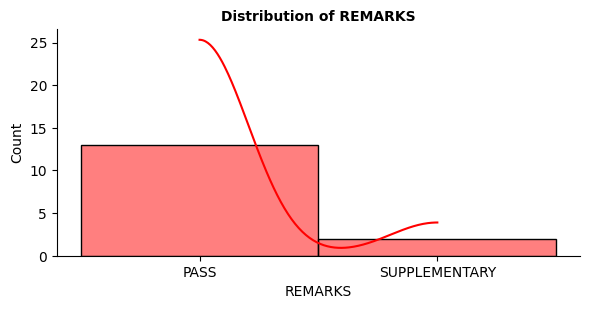

In [20]:
preprocessor.class_performance_viz(year1Main)